<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a>

# Исследование объявлений о продаже квартир
# Research of ads for sale of apartments

В вашем распоряжении — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:

pth1 = 'real_estate_data.csv'
pth2 = '/datasets/real_estate_data.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1, sep='\t')
elif os.path.exists(pth2):
    df = pd.read_csv(pth2, sep='\t')
else:
    print('Something is wrong')

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
#получение списка столбцов имеющих тип данных 'int64', 'object', 'bool'
df.select_dtypes(include=['int64', 'object', 'bool']).columns

Index(['total_images', 'first_day_exposition', 'rooms', 'floor',
       'is_apartment', 'studio', 'open_plan', 'locality_name'],
      dtype='object')

In [6]:
# список столбцов, исключая столбец с датами `first_day_exposition`
list_columns = ['total_images', 'rooms', 'floor',
       'is_apartment', 'studio', 'open_plan']

In [7]:
#просмотр уникальных значений столбцов, исключая столбцы с данными типа float64 и столбец 'locality_name'

for j in list_columns:
    
    print(j, sorted(df[j].unique()))
    print()

total_images [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35, 37, 39, 42, 50]

rooms [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 19]

floor [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

is_apartment [nan, False, True]

studio [False, True]

open_plan [False, True]



In [8]:
#просмотр уникальных значений столбца locality_name (Пришлось делать отдельно, т.к. не хотел сортироваться)
sorted(df['locality_name'].astype(str).unique())

['nan',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 

In [9]:
#получение списка столбцов имеющих тип данных 'float64'
df.select_dtypes(include=['float64']).columns

Index(['last_price', 'total_area', 'ceiling_height', 'floors_total',
       'living_area', 'kitchen_area', 'balcony', 'airports_nearest',
       'cityCenters_nearest', 'parks_around3000', 'parks_nearest',
       'ponds_around3000', 'ponds_nearest', 'days_exposition'],
      dtype='object')

In [10]:
# проверка на целое число, исключая NaN. Если ответ True - в столбце только целые числа, 
#Если в ответе есть False значит столбец содержит дробные числа
df['ponds_nearest'].apply(lambda x: True if np.isnan(x) else x.is_integer()).unique()

array([ True])

In [11]:
#проверка в каких столбцах типа 'float64' содержатся на самом деле целые числа
columns_float64 = ['last_price', 'total_area', 'ceiling_height', 'floors_total',
       'living_area', 'kitchen_area', 'balcony', 'airports_nearest',
       'cityCenters_nearest', 'parks_around3000', 'parks_nearest',
       'ponds_around3000', 'ponds_nearest', 'days_exposition']

for j in columns_float64:
    print(j, df[j].apply(lambda x: True if np.isnan(x) else x.is_integer()).unique())

last_price [ True]
total_area [ True False]
ceiling_height [False  True]
floors_total [ True]
living_area [ True False]
kitchen_area [ True False]
balcony [ True]
airports_nearest [ True]
cityCenters_nearest [ True]
parks_around3000 [ True]
parks_nearest [ True]
ponds_around3000 [ True]
ponds_nearest [ True]
days_exposition [ True False]


### Вывод

<div class="alert alert-block alert-warning">

Входные данные содержат 23 699 строк, 22 столбца. 14 солбцов имеют пропущенные значения. Названия столбцов записаны в правильном регистре и не требуют исправлений. Больше половины столбцов (14 шт) имеют тип данных `float64`.
    
    total_images          23699   int64   - нормально, пропусков нет
    last_price            23699   float64 - пропусков нет, но столбец имеет на самом деле целочисленные данные
    total_area            23699   float64 - нормально, пропусков нет
    first_day_exposition  23699   object  - нормально, пропусков нет
    rooms                 23699   int64   - нормально, пропусков нет
    ceiling_height        14504   float64 - есть пропуски
    floors_total          23613   float64 - есть пропуски, столбец имеет на самом деле целочисленные данные
    living_area           21796   float64 - есть пропуски
    floor                 23699   int64   - нормально, пропусков нет
    is_apartment          2775    object  - есть пропуски
    studio                23699   bool    - нормально, пропусков нет
    open_plan             23699   bool    - нормально, пропусков нет
    kitchen_area          21421   float64 - есть пропуски
    balcony               12180   float64 - есть пропуски, столбец имеет на самом деле целочисленные данные
    locality_name         23650   object  - имеются пропущенные значения, записанные в строковом формате 'nan'
    airports_nearest      18157   float64 - есть пропуски, столбец имеет на самом деле целочисленные данные
    cityCenters_nearest   18180   float64 - есть пропуски, столбец имеет на самом деле целочисленные данные
    parks_around3000      18181   float64 - есть пропуски, столбец имеет на самом деле целочисленные данные
    parks_nearest         8079    float64 - есть пропуски, столбец имеет на самом деле целочисленные данные
    ponds_around3000      18181   float64 - есть пропуски, столбец имеет на самом деле целочисленные данные
    ponds_nearest         9110    float64 - есть пропуски, столбец имеет на самом деле целочисленные данные
    days_exposition       20518   float64 - есть пропуски, столбец должен иметь целочисленные данные
        
    
    
</div>

## Предобработка данных

In [12]:
#дополнительная проверка на наличие пустых значений
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [13]:
#проверка на наличие полных дубликатов строк
df.duplicated().sum()

0

<div class="alert alert-block alert-info">
<b>ЗАПОЛНЕНИЕ ПРОПУЩЕННЫХ ДАННЫХ и обработка столбцов <b>
</div>

<div class="alert alert-block alert-info">
    
работа со столбцом `total_images`, число фотографий квартиры в объявлении
</div>

In [14]:
df.total_images.describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

In [15]:
#максимальное число в столбце 50, заменим на тип данных Int8. 
#Так как Int8 может хранить максимальное число 255 и этого более чем достаточно
df.total_images = df.total_images.astype('Int8')

In [16]:
#проверка
df.total_images.tail(3)

23696    18
23697    13
23698     4
Name: total_images, dtype: Int8

<div class="alert alert-block alert-info">
    
работа со столбцом `last_price`, цена на момент снятия с публикации
</div>

In [17]:
#максимальное значение в столбце
df.last_price.max()

763000000.0

In [18]:
#т.к. макс значение (763 000 000) не больше чем 2 147 483 647 для Int32, изменим тип данных на Int32
df.last_price = df.last_price.astype('Int32')

In [19]:
#проверка
df.last_price.tail(3)

23696     2500000
23697    11475000
23698     1350000
Name: last_price, dtype: Int32

<div class="alert alert-block alert-info">
    
работа со столбцом `rooms`,  число комнат
</div>

In [20]:
#максимальное значение в столбце
df.rooms.max()

19

In [21]:
#максимальное число в столбце 19, заменим на тип данных Int8
df.rooms = df.rooms.astype('Int8')

In [22]:
#проверка
df.rooms.tail(3)

23696    2
23697    2
23698    1
Name: rooms, dtype: Int8

<div class="alert alert-block alert-info">
    
работа со столбцом `ceiling_height`, высота потолков (м)
</div>

In [23]:
#работа со столбцом ceiling_height
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<div class="alert alert-block alert-warning">
    
Среднее значение высоты потолка 2.77 м, медианное 2.65 м. 

Обычно высота потолка около 2,7м, но из за различных покрытий потолка и пола, часто высота меньше чем 2,7 м.
Медианное значение ближе к истине.
Заменим все пропущенные значения медианным значением высоты потолка.

    
Кроме того, есть и значение с высотой потолка 100м, это совсем маловероятно. Видимо тот кто подавал обьявление написал это число беспричинно. Лучше заменить это значение на медианное.

</div>

In [24]:
#заполнение столбца ceiling_height медианным значением
df['ceiling_height'] = df['ceiling_height'].fillna(df.ceiling_height.median())

In [25]:
#проверка 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  Int8   
 1   last_price            23699 non-null  Int32  
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  Int8   
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<Axes: >

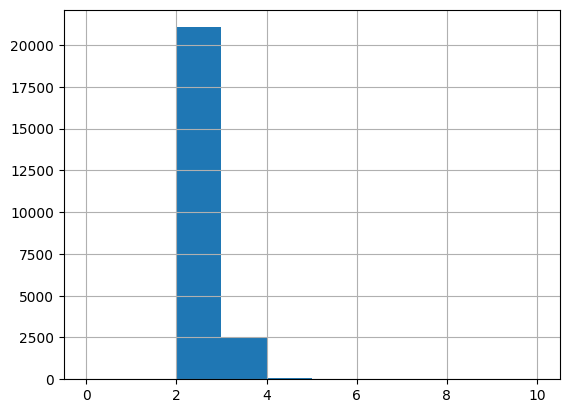

In [26]:
df['ceiling_height'].hist(range=(0, 10))

In [27]:
df.query('ceiling_height > 50')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


In [28]:
#судя по всему, это квартира в пятиэтажке и потолка в 100 м там быть не может. Заменим на медиану 
df.loc[df['ceiling_height'] > 50, 'ceiling_height'] = df['ceiling_height'].median()

In [29]:
#проверка результата замены
df['ceiling_height'].describe()

count    23699.000000
mean         2.720251
std          0.759881
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         32.000000
Name: ceiling_height, dtype: float64

<div class="alert alert-block alert-info">
    
столбец `floors_total`, всего этажей в доме
    
</div>

In [30]:
#работа со столбцом floors_total, количество этажей в доме
df['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [31]:
df[df['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000,63.5,2017-05-24T00:00:00,2,2.80,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160,64.5,2017-04-02T00:00:00,2,2.65,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263,110.4,2016-11-20T00:00:00,3,2.65,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872,123.3,2017-04-25T00:00:00,3,2.65,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


In [32]:
#просмотр уникальных значений в столбце locality_name, с неизвестным количеством этажей NaN.
df[df['floors_total'].isna()]['locality_name'].value_counts()

Санкт-Петербург                    70
Кудрово                             2
посёлок Мурино                      2
Красное Село                        2
поселок Мурино                      2
посёлок Щеглово                     1
посёлок Бугры                       1
городской посёлок Новоселье         1
посёлок Шушары                      1
поселок городского типа Токсово     1
деревня Новое Девяткино             1
посёлок Стрельна                    1
Name: locality_name, dtype: int64

In [33]:
#информация для нас.пунктов кроме СПб
df.loc[df['locality_name'] != 'Санкт-Петербург']['floors_total'].describe()

count    7962.000000
mean        9.254459
std         6.798594
min         1.000000
25%         5.000000
50%         5.000000
75%        12.000000
max        60.000000
Name: floors_total, dtype: float64

In [34]:
#информация для СПб
df.loc[df['locality_name'] == 'Санкт-Петербург']['floors_total'].describe()

count    15651.000000
mean        11.395885
std          6.372330
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         52.000000
Name: floors_total, dtype: float64

<div class="alert alert-block alert-warning">
    
Медианная этажность в Санкт-Петербурге 9, а в окрестных городах и сёлах 5 этажей.
    Заменим пропущенные значения на медиану в зависимости от населенного пункта. Для СПб 9 этажей, для других 5 этажей. Если медиана больше номера этажа `floor`, то меняем на текущий этаж

В принципе эти строки можно удалить, т.к. их количество невелико, всего 86 строк, это около 0,4%
</div>

In [35]:
#замена для СПб, если этаж меньше медианы
df.loc[
    (df['locality_name'] == 'Санкт-Петербург') & 
    (df['floors_total'].isna()) & 
    (df['floor'] <= 9), 
    'floors_total'
] = 9

In [36]:
#замена для СПб, если этаж больше медианы
df.loc[
    (df['locality_name'] == 'Санкт-Петербург') & 
    (df['floors_total'].isna()) & 
    (df['floor'] > 9), 
    'floors_total'
] = df['floor']

In [37]:
#замена для других городов, если этаж меньше медианы
df.loc[
    (df['locality_name'] != 'Санкт-Петербург') & 
    (df['floors_total'].isna()) & 
    (df['floor'] <= 5), 
    'floors_total'
] = 5

In [38]:
#замена для других городов, если этаж больше медианы
df.loc[
    (df['locality_name'] != 'Санкт-Петербург') & 
    (df['floors_total'].isna()) & 
    (df['floor'] > 5), 
    'floors_total'
] = df['floor']

In [39]:
#изменение на тип данных int8, т.к. число в столбце не более 60
df['floors_total'] = df['floors_total'].astype('int8')

In [40]:
#проверка изменений
df['floors_total'].tail(3)

23696     3
23697    17
23698     5
Name: floors_total, dtype: int8

<div class="alert alert-block alert-info">
    
столбец `living_area`, жилая площадь в квадратных метрах (м²)
    
</div>

In [41]:
df.living_area.describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [42]:
#количество пропусков
df.living_area.isna().sum()

1903

In [43]:
#просмотр строк с жилой площадью NaN и с 'нормальной' площадью кухни
df.loc[(df['living_area'].isna()) & (df['kitchen_area'].isna() == False)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
7,5,7915000,71.60,2019-04-18T00:00:00,2,2.65,24,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
116,18,10999000,97.20,2017-11-13T00:00:00,3,2.50,16,NaN,16,NaN,...,18.30,5.0,Санкт-Петербург,19426.0,21138.0,0.0,NaN,2.0,390.0,394.0
165,17,7430000,60.20,2019-02-28T00:00:00,2,2.50,4,NaN,2,NaN,...,10.20,NaN,Сестрорецк,54526.0,35625.0,0.0,NaN,0.0,NaN,NaN
238,5,5420000,43.40,2019-04-16T00:00:00,1,2.65,24,NaN,2,NaN,...,12.40,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
360,6,4990000,57.84,2018-08-22T00:00:00,2,2.65,27,NaN,13,NaN,...,10.19,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23534,9,3900000,39.00,2017-12-01T00:00:00,1,2.65,16,NaN,15,False,...,10.00,1.0,Санкт-Петербург,14730.0,13526.0,0.0,NaN,0.0,NaN,464.0
23584,17,2450000,66.00,2019-04-03T00:00:00,3,2.65,5,NaN,1,NaN,...,8.00,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23587,7,12100000,88.00,2017-07-07T00:00:00,3,2.65,10,NaN,5,NaN,...,14.00,NaN,Санкт-Петербург,37412.0,8370.0,1.0,392.0,2.0,359.0,200.0
23588,7,8100000,69.00,2015-10-14T00:00:00,2,2.65,10,NaN,8,NaN,...,10.00,2.0,Санкт-Петербург,23617.0,5223.0,0.0,NaN,1.0,874.0,823.0


In [44]:
#расчет отношения медианных жилой площади к общей площади
living_total_coeff = (
    df.loc[df['living_area'].isna() == False]['living_area'].median() / 
    df.loc[df['living_area'].isna() == False]['total_area'].median()
)
living_total_coeff

0.5769230769230769

In [45]:
#заполнение столбца living_area средним значением на основе отношения "медианной жилой площади к общей площади"
df['living_area'] = df['living_area'].fillna(df['total_area'] * living_total_coeff)

In [46]:
#проверка количество пропусков
df.living_area.isna().sum()

0

In [47]:
#проверка для строк 7 и 116
df.loc[[7,116]]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
7,5,7915000,71.6,2019-04-18T00:00:00,2,2.65,24,41.307692,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
116,18,10999000,97.2,2017-11-13T00:00:00,3,2.50,16,56.076923,16,NaN,...,18.3,5.0,Санкт-Петербург,19426.0,21138.0,0.0,NaN,2.0,390.0,394.0


<div class="alert alert-block alert-info">
    
столбец `floor`, этаж
    
</div>

In [48]:
#максимальное число в столбце
df.floor.max()

33

In [49]:
#замена на тип данных Int8
df.floor = df.floor.astype('Int8')

In [50]:
df.floor.tail(3)

23696     1
23697    12
23698     1
Name: floor, dtype: Int8

<div class="alert alert-block alert-info">
    
столбец `kitchen_area`, площадь кухни (м²)
    
</div>

In [51]:
df.kitchen_area.describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [52]:
#количество пропусков. 
df.kitchen_area.isna().sum()

2278

In [53]:
#расчет отношения медианных площади кухни к общей площади ()
kitchen_total_coeff = (
    df.loc[df['kitchen_area'].isna() == False]['kitchen_area'].median() / 
    df.loc[df['kitchen_area'].isna() == False]['total_area'].median()
)
kitchen_total_coeff

0.17333333333333334

In [54]:
#заполнение столбца kitchen_area медианным значением
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * kitchen_total_coeff)

In [55]:
#количество пропусков. 
df.kitchen_area.isna().sum()

0

<div class="alert alert-block alert-info">
    
столбец `is_apartment`, апартаменты 
    
</div>

In [56]:
#количество пропусков. 
df.is_apartment.isna().sum()

20924

In [57]:
df.is_apartment.value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [58]:
#пропусков 20 924, аппартаменты есть - 50, аппартаментов нет - 2725. По видимому NaN там где аппартаментов нет.
#Заменим NaN на False

In [59]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [60]:
#количество пропусков, проверка
df.is_apartment.isna().sum()

0

In [61]:
#доп проверка
df.is_apartment.tail(3)

23696    False
23697    False
23698    False
Name: is_apartment, dtype: bool

<div class="alert alert-block alert-info">
    
столбец `balcony`, количество балконов 
    
</div>

In [62]:
df.balcony.isna().sum()

11519

In [63]:
df.balcony.describe()

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

In [64]:
#просмотр строк с балконами NaN
df.loc[df['balcony'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000,30.40,2018-09-10T00:00:00,1,2.65,12,14.40,5,False,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000,33.16,2018-05-23T00:00:00,1,2.65,27,15.43,26,False,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
10,5,5050000,39.60,2017-11-16T00:00:00,1,2.67,12,20.30,3,False,...,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0


<Axes: >

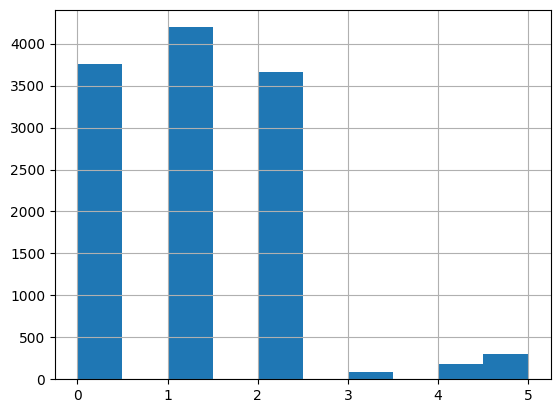

In [65]:
df.balcony.hist()

<div class="alert alert-block alert-warning">
Наиболее распространённые значения 0,1 и 2 балкона. Скорее всего отсутствующие балконы NaN принадлежат к одной из этих групп. Более того, пользователь не указал кол-во балконов, видимо их нет. Заменим эти пропущенные данные на 0.

In [66]:
#замена на 0
df['balcony'] = df['balcony'].fillna(0)

In [67]:
#изменение типа данных на int8, т.к. кол-во балконов максимум 5
df['balcony'] = df['balcony'].astype('Int8')

In [68]:
#проверка
df.balcony.tail(3)

23696    0
23697    2
23698    0
Name: balcony, dtype: Int8

<div class="alert alert-block alert-info">
    
столбец `locality_name`, название населённого пункта 
    
</div>

In [69]:
df.locality_name.isna().sum()

49

<div class="alert alert-block alert-warning">
отсутствие данных о населенном пунке, где расположено жильё, не позволяет использовать их для анализа. Считаю такие строки лучше удалить. Тем более что процент пропуска не большой, около 0,2%

In [70]:
#удаление строк с пустыми данными о нас.пункте
df = df.loc[~df['locality_name'].isna()]

In [71]:
#проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  Int8   
 1   last_price            23650 non-null  Int32  
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  Int8   
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  int8   
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  Int8   
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  Int8   
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-block alert-info">
    
столбец `airports_nearest`, расстояние до ближайшего аэропорта в метрах (м)
    
</div>

In [72]:
df.airports_nearest.isna().sum()

5534

<div class="alert alert-block alert-warning">
количество пропусков большое, около 23%. Этот параметр может влиять на ценообразование, хорошо было б такие пропуски исправить. 

In [73]:
#проверка среднего значения расстояния до аэропорта в зависимости от нас.пункта
df.groupby('locality_name')['airports_nearest'].mean()#.isna().sum()#.sort_values()#.isna().sum()

locality_name
Бокситогорск           NaN
Волосово               NaN
Волхов                 NaN
Всеволожск             NaN
Выборг                 NaN
                        ..
село Путилово          NaN
село Рождествено       NaN
село Русско-Высоцкое   NaN
село Старая Ладога     NaN
село Шум               NaN
Name: airports_nearest, Length: 364, dtype: float64

In [74]:
#просмотр таблицы для некоторых нас.пунктов, например для 'Бокситогорск'
df.query('locality_name == "Бокситогорск"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
638,6,980000,47.1,2019-04-12T00:00:00,2,2.65,3,29.000000,3,False,...,9.000000,0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,4,950000,44.0,2018-05-05T00:00:00,2,2.65,5,25.384615,2,False,...,6.000000,1,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,156.0
1053,13,550000,29.0,2018-02-01T00:00:00,1,5.00,3,16.730769,1,False,...,5.026667,0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1761,11,999000,62.0,2018-02-15T00:00:00,4,2.65,5,46.000000,2,False,...,7.000000,0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,226.0
3010,6,850000,48.0,2016-03-11T00:00:00,2,2.65,5,27.692308,5,False,...,8.320000,0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,174.0
3731,10,1310000,65.6,2019-02-22T00:00:00,3,2.65,5,42.000000,4,False,...,7.500000,0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5821,7,820000,51.0,2017-12-09T00:00:00,2,2.65,5,32.000000,5,False,...,8.500000,0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,130.0
8630,3,560000,32.0,2018-06-16T00:00:00,1,2.65,3,17.000000,1,False,...,6.000000,0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,45.0
8767,6,650000,45.0,2017-06-24T00:00:00,2,2.65,5,30.000000,1,False,...,6.000000,0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,68.0
8779,9,620000,36.0,2018-01-15T00:00:00,1,2.65,5,19.000000,5,False,...,8.000000,0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,45.0


<div class="alert alert-block alert-warning">
Судя по группировке по 'locality_name', существует много населённых пунктов, где ни для одной квартиры не указано расстояние до аэропорта

In [75]:
df.locality_name.value_counts()

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

<div class="alert alert-block alert-info">
    
столбец `cityCenters_nearest`, расстояние до центра города (м)
    
</div>

In [76]:
df.cityCenters_nearest.isna().sum()

5511

In [77]:
#проверка среднего значения расстояния до центра в зависимости от нас.пункта
df.groupby('locality_name')['cityCenters_nearest'].mean().sort_values()#.isna().sum()

locality_name
Санкт-Петербург         11601.291571
посёлок Парголово       19924.776758
поселок Мурино          21888.000000
посёлок Стрельна        23376.113636
посёлок Шушары          24243.387615
                            ...     
село Путилово                    NaN
село Рождествено                 NaN
село Русско-Высоцкое             NaN
село Старая Ладога               NaN
село Шум                         NaN
Name: cityCenters_nearest, Length: 364, dtype: float64

In [78]:
#кол-во пропусков расстояния до центра для "Санкт-Петербург"
df.query('locality_name == "Санкт-Петербург"')['cityCenters_nearest'].isna().sum()

61

<div class="alert alert-block alert-warning">
Пропуски по расстоянию до центра составляют около 23%. Удалять такие строки не стоит, т.к. потеряется значительная часть других полезных данных. Заполнить медианой ии средним значением так же будет не совсем верно, объекты недвижимости могут быть расположены где угодно, и "угадать" расстояние не получится. 
    
Принимаю решение не трогать эти строки.

<div class="alert alert-block alert-info">
    
столбец `parks_around3000`, число парков в радиусе 3 км
    
</div>

In [79]:
#количество пропусков
df.parks_around3000.isna().sum()

5510

In [80]:
#проверка суммы кол-ва парков в радиусе 3 км в зависимости от нас.пункта
df.groupby('locality_name')['parks_around3000'].sum().sort_values()#(ascending=False)#.isna().sum()

locality_name
Бокситогорск                                0.0
поселок городского типа Вырица              0.0
поселок городского типа Большая Ижора       0.0
поселок Цвылёво                             0.0
поселок Цвелодубово                         0.0
                                          ...  
Кронштадт                                 170.0
Колпино                                   176.0
Петергоф                                  269.0
Пушкин                                    276.0
Санкт-Петербург                          9828.0
Name: parks_around3000, Length: 364, dtype: float64

In [81]:
#максимальное число в столбце
df['parks_around3000'].max()

3.0

In [82]:
#перевод в Int8
df['parks_around3000'] = df['parks_around3000'].astype('Int8')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  Int8   
 1   last_price            23650 non-null  Int32  
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  Int8   
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  int8   
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  Int8   
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  Int8   
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [84]:
#изменения с float64 на и int32, для столбцов имеющих на самом деле целые чиса (дробная часть нулевая)
float64_list = [
    'airports_nearest',
    'cityCenters_nearest',
    #'parks_around3000',
    'parks_nearest',
    'ponds_around3000',
    'ponds_nearest',
    
]

for j in float64_list:
    
    df[j] = df[j].astype('Int32')

<div class="alert alert-block alert-info">
    
столбец `days_exposition`, сколько дней было размещено объявление (от публикации до снятия)
    
</div>

In [85]:
df['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [86]:
#кол-во пропусков
df['days_exposition'].isna().sum()

3180

In [87]:
#статистика о столбце
df['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [88]:
df['days_exposition'].sort_values(ascending=False)

18843    1580.0
1109     1572.0
9553     1553.0
1885     1513.0
6691     1512.0
          ...  
23684       NaN
23685       NaN
23694       NaN
23696       NaN
23698       NaN
Name: days_exposition, Length: 23650, dtype: float64

In [89]:
#перевод в Int16.
#df['days_exposition'] = df['days_exposition'].fillna(-1).astype(int).astype(str).replace('-1', np.nan).astype('float').astype('Int16')
df['days_exposition'] = df['days_exposition'].fillna(-1).astype('int16').replace(-1, np.nan)

In [90]:
df['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [91]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  Int8   
 1   last_price            23650 non-null  Int32  
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  Int8   
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  int8   
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  Int8   
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  Int8   
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-block alert-warning">
После предобработки данных и изменения типов некоторых столбцов, размер датафрейма уменьшился с 8.1 MB до 6.8 MB.

## Расчёты и добавление результатов в таблицу

<div class="alert alert-block alert-info">
    
Добавление в таблицу цены квадратного метра
    
</div>

In [92]:
#цена квадратного метра - цена жилья / общая площадь
df['price_square_meter'] = df['last_price'] / df['total_area']

In [93]:
#проверка
df.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN,120370.37037
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,False,...,2,посёлок Шушары,12817,18603,0,<NA>,0,<NA>,81.0,82920.792079


<Axes: >

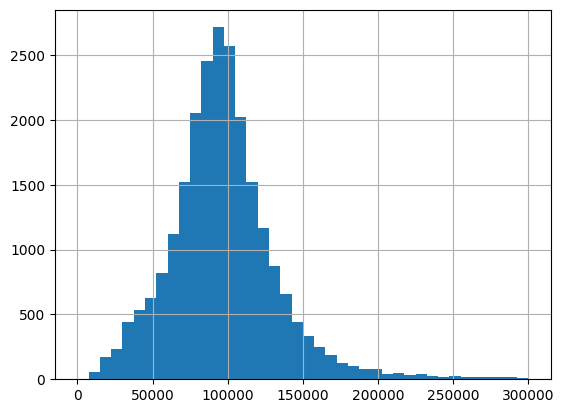

In [94]:
#гистограмма цены квадратного метра
df['price_square_meter'].hist(bins=40, range=(0, 300e3))

In [95]:
#краткая статистика по цене квадратного метра
df['price_square_meter'].describe()

count          23650.0
mean      99432.247152
std       50337.935429
min         111.834862
25%       76614.967522
50%            95000.0
75%      114274.157856
max          1907500.0
Name: price_square_meter, dtype: Float64

<div class="alert alert-block alert-info">
    
Добавление в таблицу день недели, месяц и год публикации объявления
    
</div>

In [96]:
#добавление столбца номер недели, перевод его в Int8
df['week'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S').dt.isocalendar().week.astype('Int8')

In [97]:
#добавление столбца с номером месяца
df['month'] = df['first_day_exposition'].apply(lambda x: x[5:7]).astype(float).astype('Int8')

In [98]:
#добавление столбца с годом
df['year'] = df['first_day_exposition'].apply(lambda x: x[:4]).astype(float).astype('Int16')

In [99]:
#проверка
df.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,week,month,year
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,16028,1,482,2,755,NaN,120370.37037,10,3,2019
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,False,...,18603,0,<NA>,0,<NA>,81.0,82920.792079,49,12,2018


In [100]:
#проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  Int8   
 1   last_price            23650 non-null  Int32  
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  Int8   
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  int8   
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  Int8   
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  Int8   
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-block alert-info">
    
Добавление в таблицу этаж квартиры; варианты — первый, последний, другой;
    
</div>

In [101]:
#функция, получает на вход всю строку и выдаёт признак этажа - первый, последний, другой
def floor_sign(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] > 1 and row['floor'] < row['floors_total']:
        return 'другой'
    if row['floor'] > 1 and row['floor'] == row['floors_total']:
        return 'последний'
    

In [102]:
df['floor_type'] = df.apply(floor_sign, axis=1)

In [103]:
#проверка
df[['floor', 'floors_total', 'floor_type']].sort_values(by='floor_type')

,floor,floors_total,floor_type
0,8,16,другой
14567,2,5,другой
14566,2,15,другой
14565,3,15,другой
14564,5,9,другой
...,...,...,...
15097,5,5,последний
15096,3,3,последний
15091,5,5,последний
15003,9,9,последний


<div class="alert alert-block alert-info">
    
Добавление в таблицу: соотношения жилой и общей площади, а также отношения площади кухни к общей
    
</div>

In [104]:
#добавляем столбец ratio_liv_total
df['ratio_liv_total'] = df['living_area'] / df['total_area']

In [105]:
#добавляем столбец ratio_kitch_total
df['ratio_kitch_total'] = df['kitchen_area'] / df['total_area']

In [106]:
#проверка результата
df.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,week,month,year,floor_type,ratio_liv_total,ratio_kitch_total
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,2,755,NaN,120370.37037,10,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,False,...,0,<NA>,81.0,82920.792079,49,12,2018,первый,0.460396,0.272277


## 4
## Исследовательский анализ данных

<div class="alert alert-block alert-info">
<b>    
Изучите следующие параметры: площадь, цена, число комнат, высота потолков. 
    
Постройте гистограммы для каждого параметра.
    
</div>

<Axes: >

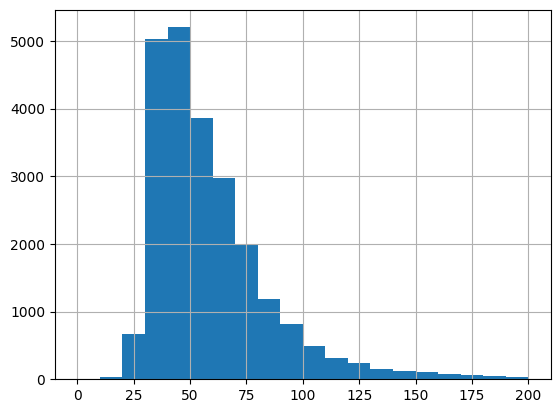

In [107]:
#гистограмма по площади
df['total_area'].hist(bins=20, range=(0, 200))

In [108]:
df['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

<Axes: >

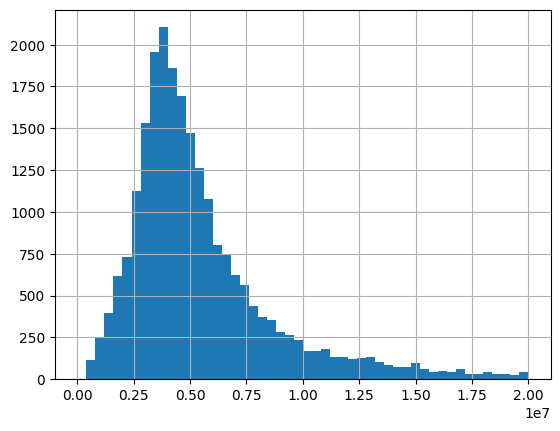

In [109]:
#гистограмма по цене
df['last_price'].hist(bins=50, range=(0, 20000000))

In [110]:
df['last_price'].describe()

count            23650.0
mean      6541126.897928
std      10896399.175038
min              12190.0
25%            3400000.0
50%            4650000.0
75%            6799000.0
max          763000000.0
Name: last_price, dtype: Float64

<Axes: >

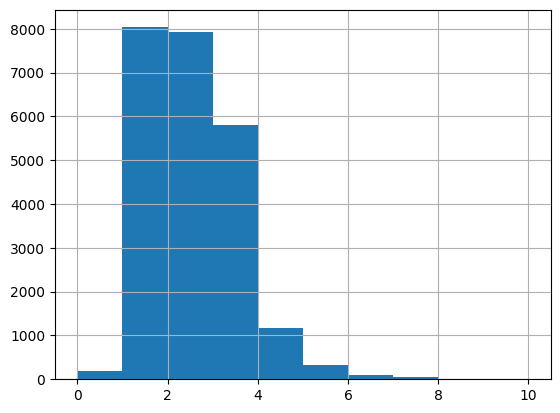

In [111]:
#гистограмма по числу комнат
df['rooms'].hist(bins=10, range=(0, 10))

In [112]:
df['rooms'].value_counts()

1     8036
2     7924
3     5797
4     1175
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: Int64

<Axes: >

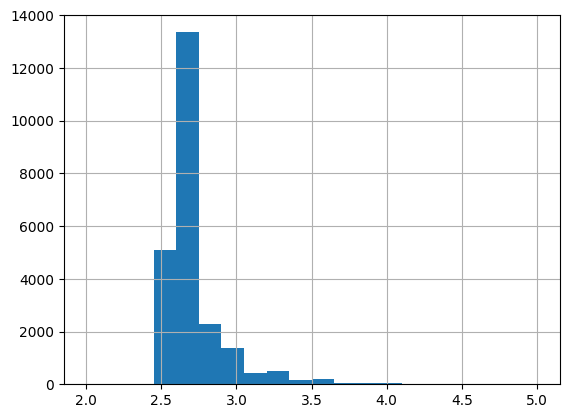

In [113]:
#гистограмма по высоте потолков
df['ceiling_height'].hist(bins=20, range=(2, 5))

In [114]:
df['ceiling_height'].describe()

count    23650.000000
mean         2.720195
std          0.760581
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         32.000000
Name: ceiling_height, dtype: float64

<div class="alert alert-block alert-warning">
Гистограммы имеют вид близкий к нормальному распределению.

<div class="alert alert-block alert-info">
    
<b>
Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. 

Опишите, сколько обычно занимает продажа. 

Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
<b>  
</div>

<Axes: >

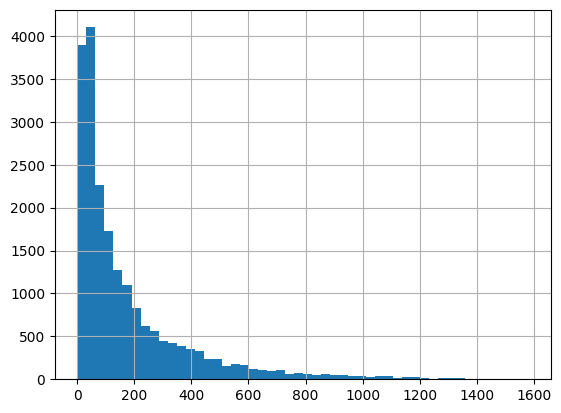

In [115]:
#гистограмма по времени продажи квартиры
df['days_exposition'].hist(bins=50)

<Axes: >

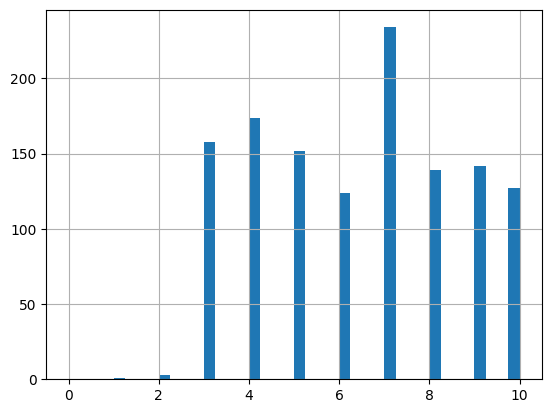

In [116]:
#гистограмма времени продажи квартиры, просмотр отрезка 0...10 дней
df['days_exposition'].hist(bins=40, range=(0, 10))

In [117]:
df['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<Axes: >

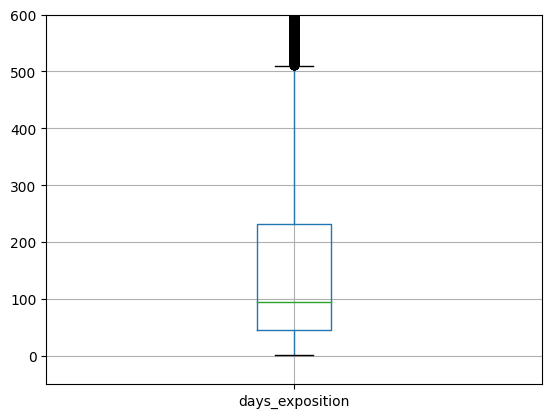

In [118]:
plt.ylim(-50, 600)
df.boxplot(column='days_exposition')

<Axes: >

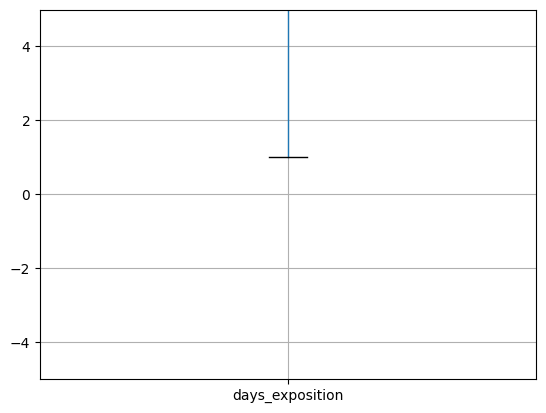

In [119]:
plt.ylim(-5, 5)
df.boxplot(column='days_exposition')

<div class="alert alert-block alert-warning">
Гистограмма, boxplot и метод describe показывают что продажа объекта осуществляется в основном от 3 до 510 дней от подачи обьявления. Самое распространённое время 95 дней, это и есть медиана.


Продажу быстрее 3-х дней можно считать быстрой, а дольше 510 дней можно считать необычно долгой.

<div class="alert alert-block alert-info">

<b>Уберите редкие и выбивающиеся значения. 
    
<b>Опишите, какие особенности обнаружили.
    
</div>

<div class="alert alert-block alert-info">

Столбец `days_exposition`
    
</div>

In [120]:
df.query('days_exposition <= 2')['days_exposition'].count()

4

In [121]:
df.query('days_exposition <= 3')['days_exposition'].count()

162

<div class="alert alert-block alert-warning">
Значения 2 дня и меньше, всего 4 шт. 

Т.е. в датафрейме всего 4 обьявления о продаже со временем продажи менее или равно 2 дня.

Стоит исключить эти данные. (хотя boxplot показывает что это 1 день !!!)

<div class="alert alert-block alert-warning">
Верхнюю границу можно взять из boxplot, это около 510 дней
    
</div>

In [122]:
#проверка процента потерь данных при удаленииих части
df.query('~(days_exposition >= 3 & days_exposition <= 510)')['days_exposition'].count()

1678

In [123]:
1678 / 23650

0.07095137420718817

<div class="alert alert-block alert-warning">
Процент потерь составляет около 7,1%. Слишком много.
    
    
Использую правило математики для стандартного отклонения std.
    
В диапазоне +/- 2 std находится 95% выборки, а потери составляют около 4,6%
То есть:
mean       180.753200
std        219.777916
    
Отсюда верхняя граница 181 + 2*220 = 621
</div>

In [124]:
#отфильтровка значений с временем продажи больше 3х и меньше 510 дней, включительно. Сброс индексов.
df_fltred = df.query('days_exposition >= 3 & days_exposition <= 621').reset_index(drop=True)

In [125]:
df_fltred.days_exposition.describe()

count    19355.000000
mean       141.091088
std        140.120324
min          3.000000
25%         43.000000
50%         89.000000
75%        197.000000
max        621.000000
Name: days_exposition, dtype: float64

In [126]:
df_fltred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19355 entries, 0 to 19354
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          19355 non-null  Int8   
 1   last_price            19355 non-null  Int32  
 2   total_area            19355 non-null  float64
 3   first_day_exposition  19355 non-null  object 
 4   rooms                 19355 non-null  Int8   
 5   ceiling_height        19355 non-null  float64
 6   floors_total          19355 non-null  int8   
 7   living_area           19355 non-null  float64
 8   floor                 19355 non-null  Int8   
 9   is_apartment          19355 non-null  bool   
 10  studio                19355 non-null  bool   
 11  open_plan             19355 non-null  bool   
 12  kitchen_area          19355 non-null  float64
 13  balcony               19355 non-null  Int8   
 14  locality_name         19355 non-null  object 
 15  airports_nearest   

<div class="alert alert-block alert-info">

Столбец `last_price`
    
</div>

<Axes: >

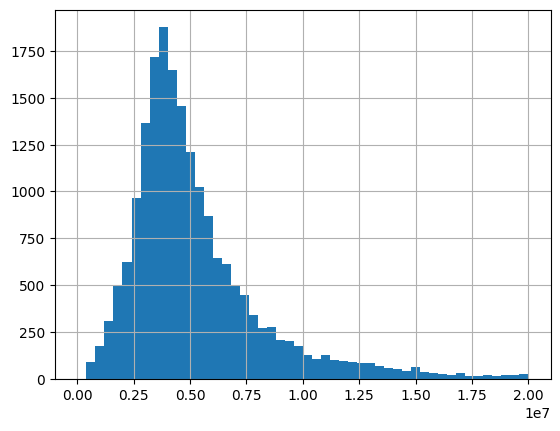

In [127]:
df_fltred['last_price'].hist(bins=50, range=(0, 20000000))

<Axes: >

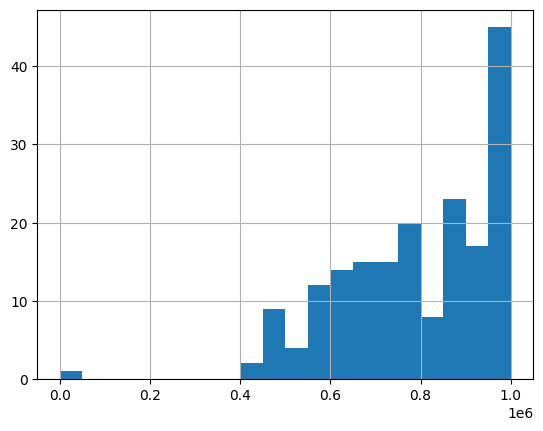

In [128]:
#просмотр начала диапазона цены на квартиры
df_fltred['last_price'].hist(bins=20, range=(0, 1e+6))

<Axes: >

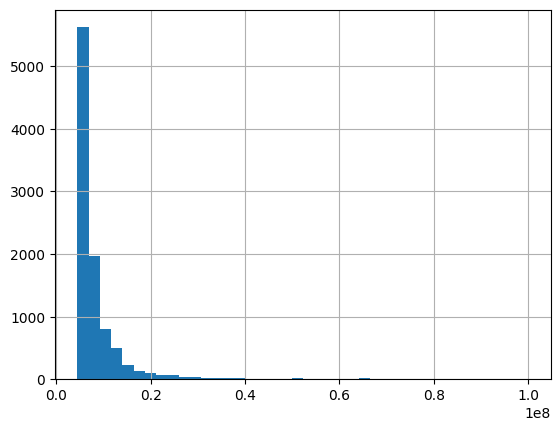

In [129]:
#просмотр конца диапазона цены на квартиры
df_fltred['last_price'].hist(bins=40, range=(4.5e+6, 1e+8))

In [130]:
df_fltred['last_price'].describe()

count            19355.0
mean      6130349.821338
std      10735841.054072
min              12190.0
25%            3390000.0
50%            4500000.0
75%            6400000.0
max          763000000.0
Name: last_price, dtype: Float64

<div class="alert alert-block alert-warning">
в основном цены на квартиры находятся до 30e+06 (30млн рублей). Оставим квартиры стоимостью до 30 млн. Таже удалим квартиры стоимостью ниже 0,4 млн.

In [131]:
#процент потерь
100 * df_fltred.query('~(0.4e+6 < last_price < 30e+6)')['last_price'].count() / 19355

1.1004908292430897

<div class="alert alert-block alert-warning">
Процент потерь около 1,1%

In [132]:
#фильтрование по цене. Остаются квартиры от 0,4 до 30 млн.руб
df_fltred = df_fltred.query('0.4e+6 < last_price < 30e+6').reset_index(drop=True)

In [133]:
#проверка
df_fltred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19142 entries, 0 to 19141
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          19142 non-null  Int8   
 1   last_price            19142 non-null  Int32  
 2   total_area            19142 non-null  float64
 3   first_day_exposition  19142 non-null  object 
 4   rooms                 19142 non-null  Int8   
 5   ceiling_height        19142 non-null  float64
 6   floors_total          19142 non-null  int8   
 7   living_area           19142 non-null  float64
 8   floor                 19142 non-null  Int8   
 9   is_apartment          19142 non-null  bool   
 10  studio                19142 non-null  bool   
 11  open_plan             19142 non-null  bool   
 12  kitchen_area          19142 non-null  float64
 13  balcony               19142 non-null  Int8   
 14  locality_name         19142 non-null  object 
 15  airports_nearest   

<div class="alert alert-block alert-info">

Столбец `total_area`
    
</div>

<Axes: >

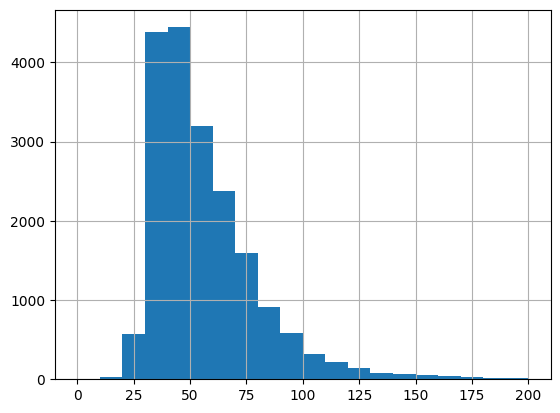

In [134]:
df_fltred['total_area'].hist(bins=20, range=(0, 200))

In [135]:
df_fltred['total_area'].describe()

count    19142.000000
mean        56.321758
std         26.150392
min         12.000000
25%         39.000000
50%         50.000000
75%         66.000000
max        460.800000
Name: total_area, dtype: float64

<div class="alert alert-block alert-warning">
Здесь всё в порядке, среднее значение площади 56 м2, а отклонение примерно 26 м2. Ничего менять не буду

<Axes: >

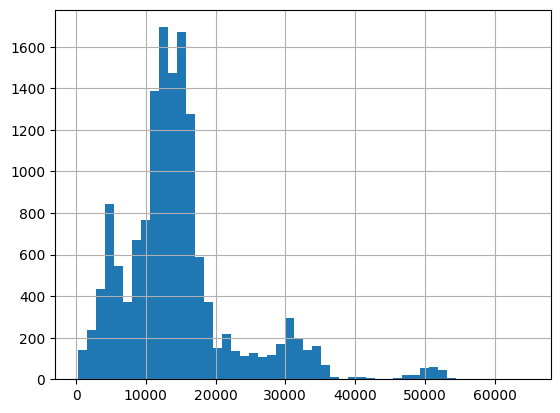

In [136]:
df_fltred['cityCenters_nearest'].hist(bins=50)#, range=(0, 25000))

In [137]:
df_fltred['cityCenters_nearest'].describe()

count         14727.0
mean     14546.415292
std       8461.830732
min             208.0
25%            9975.5
50%           13318.0
75%           16474.0
max           64857.0
Name: cityCenters_nearest, dtype: Float64

<div class="alert alert-block alert-warning">


Справа от главного лепестка гистограммы, есть некоторые боковые лепестки. 
Согласно карте максимальный радиус СПб 18км, следовательно не может быть расстояния от центра города больше этой величины.
    
    
При этом если удалить данные с расстояниями более 18 км, то пропадает больше половины данных. Видимо для квартир находящихся в области указали расстояние не до центра города где продаётся квартира, а до центра СПб.

Так же, согласно гистограмме, наблюдается резкое падение количества обьявлений с расстоянием более 55км.
Считаю что обьявления с расстоянием более 55 км следует убрать из выборки, т.к. их влияние мало

In [138]:
df_fltred.query('cityCenters_nearest > 55000')['cityCenters_nearest'].count()

7

In [139]:
df_fltred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19142 entries, 0 to 19141
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          19142 non-null  Int8   
 1   last_price            19142 non-null  Int32  
 2   total_area            19142 non-null  float64
 3   first_day_exposition  19142 non-null  object 
 4   rooms                 19142 non-null  Int8   
 5   ceiling_height        19142 non-null  float64
 6   floors_total          19142 non-null  int8   
 7   living_area           19142 non-null  float64
 8   floor                 19142 non-null  Int8   
 9   is_apartment          19142 non-null  bool   
 10  studio                19142 non-null  bool   
 11  open_plan             19142 non-null  bool   
 12  kitchen_area          19142 non-null  float64
 13  balcony               19142 non-null  Int8   
 14  locality_name         19142 non-null  object 
 15  airports_nearest   

In [140]:
df_fltred['cityCenters_nearest'] = df_fltred['cityCenters_nearest'].fillna(-1)#.astype('int16').replace(-1, np.nan)

In [141]:
df_fltred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19142 entries, 0 to 19141
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          19142 non-null  Int8   
 1   last_price            19142 non-null  Int32  
 2   total_area            19142 non-null  float64
 3   first_day_exposition  19142 non-null  object 
 4   rooms                 19142 non-null  Int8   
 5   ceiling_height        19142 non-null  float64
 6   floors_total          19142 non-null  int8   
 7   living_area           19142 non-null  float64
 8   floor                 19142 non-null  Int8   
 9   is_apartment          19142 non-null  bool   
 10  studio                19142 non-null  bool   
 11  open_plan             19142 non-null  bool   
 12  kitchen_area          19142 non-null  float64
 13  balcony               19142 non-null  Int8   
 14  locality_name         19142 non-null  object 
 15  airports_nearest   

In [142]:
df_fltred['cityCenters_nearest'].isna().sum()

0

In [143]:
df_fltred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19142 entries, 0 to 19141
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          19142 non-null  Int8   
 1   last_price            19142 non-null  Int32  
 2   total_area            19142 non-null  float64
 3   first_day_exposition  19142 non-null  object 
 4   rooms                 19142 non-null  Int8   
 5   ceiling_height        19142 non-null  float64
 6   floors_total          19142 non-null  int8   
 7   living_area           19142 non-null  float64
 8   floor                 19142 non-null  Int8   
 9   is_apartment          19142 non-null  bool   
 10  studio                19142 non-null  bool   
 11  open_plan             19142 non-null  bool   
 12  kitchen_area          19142 non-null  float64
 13  balcony               19142 non-null  Int8   
 14  locality_name         19142 non-null  object 
 15  airports_nearest   

In [144]:
df_fltred = df_fltred.query('cityCenters_nearest < 55000').reset_index(drop=True)

In [145]:
df_fltred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19135 entries, 0 to 19134
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          19135 non-null  Int8   
 1   last_price            19135 non-null  Int32  
 2   total_area            19135 non-null  float64
 3   first_day_exposition  19135 non-null  object 
 4   rooms                 19135 non-null  Int8   
 5   ceiling_height        19135 non-null  float64
 6   floors_total          19135 non-null  int8   
 7   living_area           19135 non-null  float64
 8   floor                 19135 non-null  Int8   
 9   is_apartment          19135 non-null  bool   
 10  studio                19135 non-null  bool   
 11  open_plan             19135 non-null  bool   
 12  kitchen_area          19135 non-null  float64
 13  balcony               19135 non-null  Int8   
 14  locality_name         19135 non-null  object 
 15  airports_nearest   

In [146]:
df_fltred['cityCenters_nearest'] = df_fltred['cityCenters_nearest'].replace(-1, np.nan).astype('Int32')

In [147]:
#проверка
df_fltred['cityCenters_nearest'].describe()

count         14720.0
mean     14524.092731
std        8401.57918
min             208.0
25%            9974.0
50%           13313.0
75%           16470.0
max           54926.0
Name: cityCenters_nearest, dtype: Float64

In [148]:
df_fltred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19135 entries, 0 to 19134
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          19135 non-null  Int8   
 1   last_price            19135 non-null  Int32  
 2   total_area            19135 non-null  float64
 3   first_day_exposition  19135 non-null  object 
 4   rooms                 19135 non-null  Int8   
 5   ceiling_height        19135 non-null  float64
 6   floors_total          19135 non-null  int8   
 7   living_area           19135 non-null  float64
 8   floor                 19135 non-null  Int8   
 9   is_apartment          19135 non-null  bool   
 10  studio                19135 non-null  bool   
 11  open_plan             19135 non-null  bool   
 12  kitchen_area          19135 non-null  float64
 13  balcony               19135 non-null  Int8   
 14  locality_name         19135 non-null  object 
 15  airports_nearest   

In [149]:
df_fltred.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,week,month,year,floor_type,ratio_liv_total,ratio_kitch_total
0,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,False,...,0,<NA>,81.0,82920.792079,49,12,2018,первый,0.460396,0.272277
1,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,False,...,2,574,558.0,92785.714286,34,8,2015,другой,0.612500,0.148214
2,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,1,48,121.0,100000.0,25,6,2018,другой,0.320000,0.410000
3,10,2890000,30.4,2018-09-10T00:00:00,1,2.65,12,14.4,5,False,...,<NA>,<NA>,55.0,95065.789474,37,9,2018,другой,0.473684,0.299342
4,6,3700000,37.3,2017-11-02T00:00:00,1,2.65,26,10.6,6,False,...,0,<NA>,155.0,99195.710456,44,11,2017,другой,0.284182,0.386059


<div class="alert alert-block alert-info">
<b>    
Какие факторы больше всего влияют на стоимость квартиры? 
    
Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. 
    
Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
    
Также изучите зависимость от даты размещения: дня недели, месяца и года.
<b>    
</div>

(0.0, 150.0)

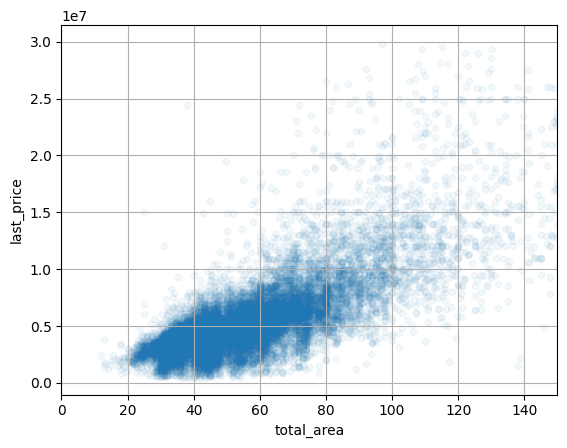

In [150]:
#зависит ли цена от площади, числа комнат, удалённости от центра.
#проверка зависимости цены от площади
df_fltred.plot(x='total_area', y='last_price', kind='scatter', grid=True, alpha=0.05)
plt.xlim(0, 150)

In [151]:
#проверка корреляции между ценой и площадью
df_fltred.corr()

/tmp/ipykernel_7689/3068359503.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_fltred.corr()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,week,month,year,ratio_liv_total,ratio_kitch_total
total_images,1.000000,0.147878,0.099102,0.078257,0.003524,0.013036,0.080537,0.030318,0.013906,-0.029449,...,0.004984,-0.016252,-0.002332,-0.004410,0.131987,0.027184,0.026523,0.120686,-0.010744,-0.011150
last_price,0.147878,1.000000,0.781942,0.514873,0.098433,0.080508,0.684672,0.080370,0.014551,-0.054376,...,0.053472,0.192837,-0.111678,0.102047,0.641446,0.003851,0.003432,-0.037518,0.013794,-0.111607
total_area,0.099102,0.781942,1.000000,0.790581,0.086406,-0.052802,0.934024,-0.027484,0.012327,-0.090814,...,0.013867,0.142011,-0.071792,0.128180,0.099494,0.001678,0.001209,-0.081845,0.172020,-0.333373
rooms,0.078257,0.514873,0.790581,1.000000,0.041578,-0.226137,0.861973,-0.162378,0.000900,-0.159346,...,-0.033598,0.067365,-0.037405,0.102793,-0.093907,-0.001336,-0.001788,-0.069031,0.486815,-0.567059
ceiling_height,0.003524,0.098433,0.086406,0.041578,1.000000,-0.016376,0.080018,-0.010056,0.097648,0.002421,...,-0.014613,0.064548,-0.050900,0.024628,0.062687,-0.002799,-0.002591,-0.005659,0.003421,0.001691
floors_total,0.013036,0.080508,-0.052802,-0.226137,-0.016376,1.000000,-0.158922,0.677215,-0.021872,0.069577,...,0.100777,-0.117854,0.043582,-0.049507,0.258785,0.009517,0.009418,0.021074,-0.352579,0.335041
living_area,0.080537,0.684672,0.934024,0.861973,0.080018,-0.158922,1.000000,-0.107835,0.012976,-0.065061,...,-0.020724,0.123776,-0.054985,0.120562,0.019776,-0.003032,-0.003427,-0.076295,0.475125,-0.505999
floor,0.030318,0.080370,-0.027484,-0.162378,-0.010056,0.677215,-0.107835,1.000000,-0.013209,0.034884,...,0.084085,-0.073233,0.020589,-0.038031,0.202826,0.016899,0.016812,0.012900,-0.259613,0.240131
is_apartment,0.013906,0.014551,0.012327,0.000900,0.097648,-0.021872,0.012976,-0.013209,1.000000,-0.003290,...,-0.022475,0.019036,0.006424,-0.013547,0.029278,-0.004930,-0.005346,0.027761,0.003029,0.008646
studio,-0.029449,-0.054376,-0.090814,-0.159346,0.002421,0.069577,-0.065061,0.034884,-0.003290,1.000000,...,0.009372,0.005509,0.005080,-0.024952,0.034498,-0.000320,0.000919,0.016695,0.093475,-0.018284


<Axes: xlabel='rooms', ylabel='last_price'>

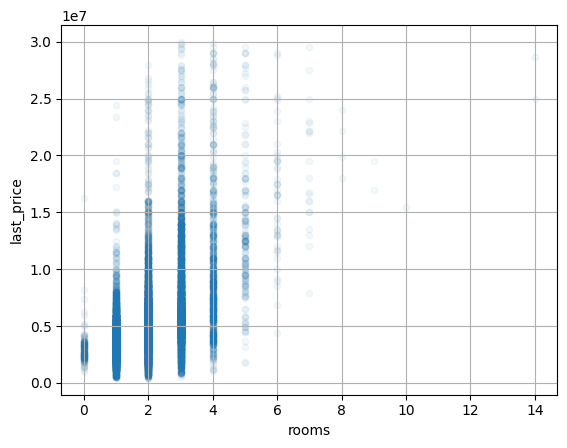

In [152]:
#зависит ли цена от площади, числа комнат, удалённости от центра.
#проверка зависимости цены от площади
df_fltred.plot(x='rooms', y='last_price', kind='scatter', grid=True, alpha=0.05)
#plt.ylim(0, 150)

<div class="alert alert-block alert-warning">

Здесь зависимости так же есть, но уже не такая явная. Видно что чем больше комнат тем цена в среднем больше. Коэффициент корреляции 0.51.

<Axes: xlabel='cityCenters_nearest', ylabel='last_price'>

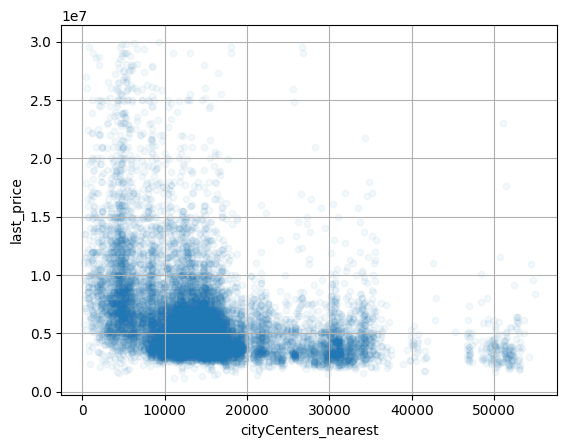

In [153]:
#зависит ли цена от площади, числа комнат, удалённости от центра.
#проверка зависимости цены от удаленности от центра города
df_fltred.plot(x='cityCenters_nearest', y='last_price', kind='scatter', grid=True, alpha=0.05)
#plt.ylim(0, 150)

<div class="alert alert-block alert-warning">
Зависимость есть, но она слабая. Квартиры ближе к центру дороже. коэффициент корреляции около минус 0,34.
    
Есть идея проверить зависимость цены при примерно одинаковой площади квартиры

<Axes: xlabel='cityCenters_nearest', ylabel='last_price'>

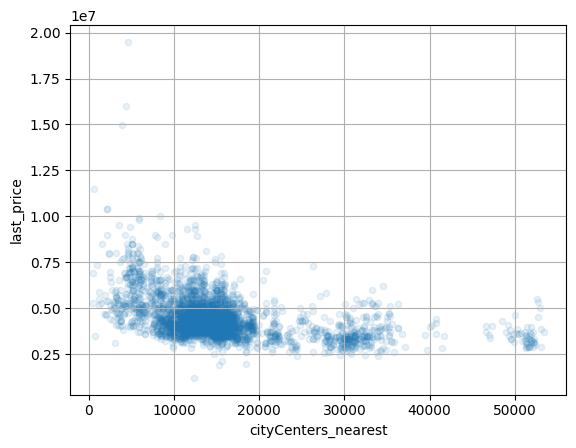

In [154]:
df_fltred.query('40 < total_area < 50').plot(x='cityCenters_nearest', y='last_price', kind='scatter', grid=True, alpha=0.1)

<div class="alert alert-block alert-warning">

Есть небольшая зависимость при примерно одинаковой площади. Чем ближе к центру тем дороже.

<div class="alert alert-block alert-info">
<b>    
Выберите 10 населённых пунктов с наибольшим числом объявлений. 
    
Посчитайте среднюю цену квадратного метра в этих населённых пунктах. 
    
Выделите населённые пункты с самой высокой и низкой стоимостью жилья. 
    
Эти данные можно найти по имени в столбце locality_name.
<b>    
</div>

In [155]:
df_fltred.locality_name.unique()


array(['посёлок Шушары', 'Санкт-Петербург', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Кингисепп', 'Сестрорецк',
       'деревня Куттузи', 'поселок городского типа Ефимовский',
       'посёлок Плодовое', 'деревня Заклинье', 'поселок Торковичи',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой',
       'посёлок Новый Свет', 'Приозерск', 'Сланцы', 'село Путилово',
       'Ивангород', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'поселок Новый Свет', 'деревня Кальтино',
     

In [156]:
#выбор 10ти нас пунктов с наибольшим числом обьявлений

locality_top10 = (df_fltred
               .groupby('locality_name')#, as_index=False)
               ['total_area'].count()
               .sort_values(ascending=False)
               [:10]
              )
locality_top10

locality_name
Санкт-Петербург      12643
посёлок Мурино         498
посёлок Шушары         394
Всеволожск             323
Колпино                299
посёлок Парголово      293
Пушкин                 287
деревня Кудрово        277
Гатчина                251
Выборг                 196
Name: total_area, dtype: int64

In [157]:
#расчет средней цены для этих 10ти городов
(
df_fltred.query('locality_name in @locality_top10.index')
    .groupby('locality_name')
    .last_price.mean()
    .astype('Int32')
    .sort_values(ascending=False)
)

locality_name
Санкт-Петербург      6459968
Пушкин               5950663
посёлок Парголово    4404793
деревня Кудрово      4251890
посёлок Шушары       4051618
Колпино              3790920
Всеволожск           3705208
посёлок Мурино       3645952
Гатчина              3381171
Выборг               3026750
Name: last_price, dtype: Int32

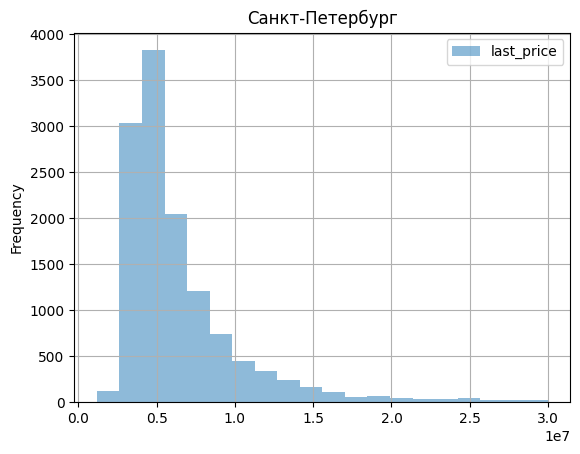

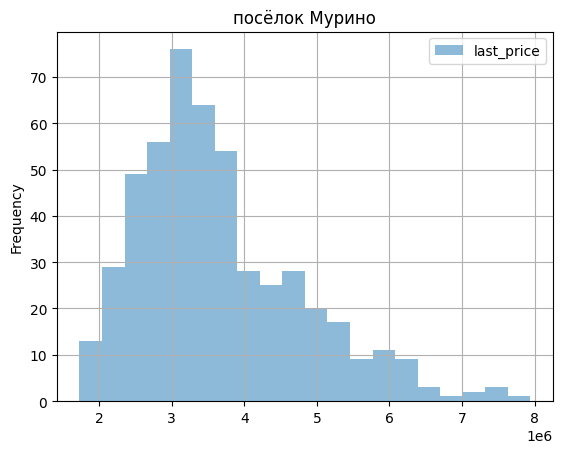

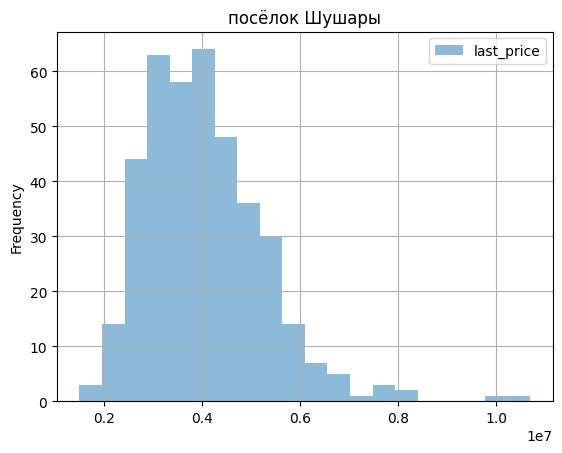

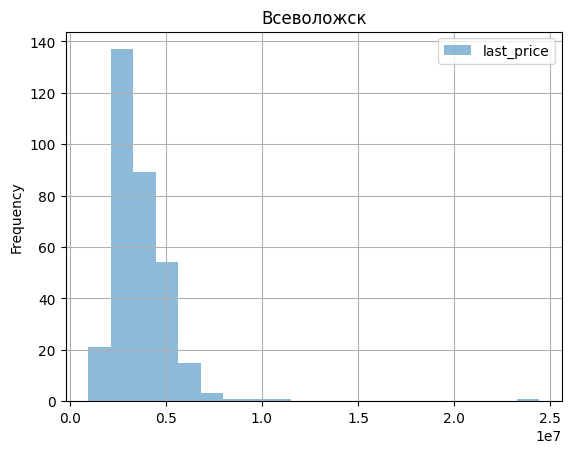

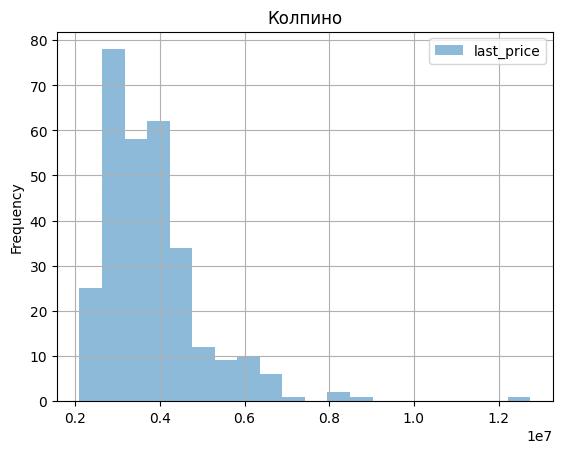

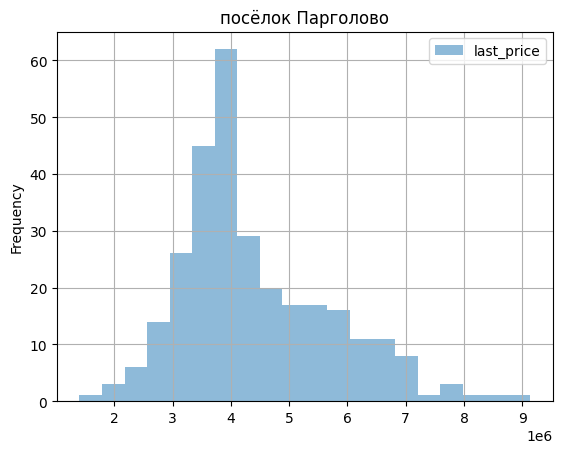

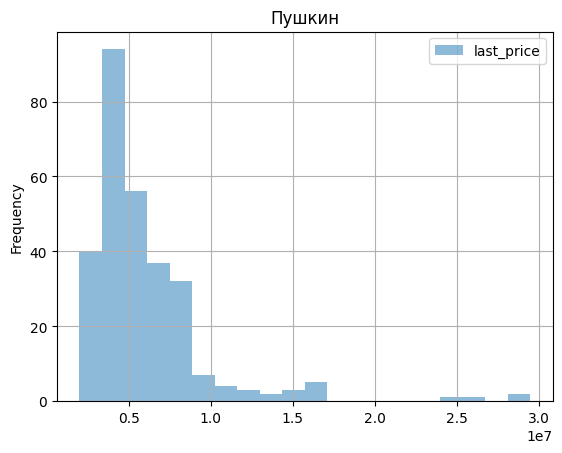

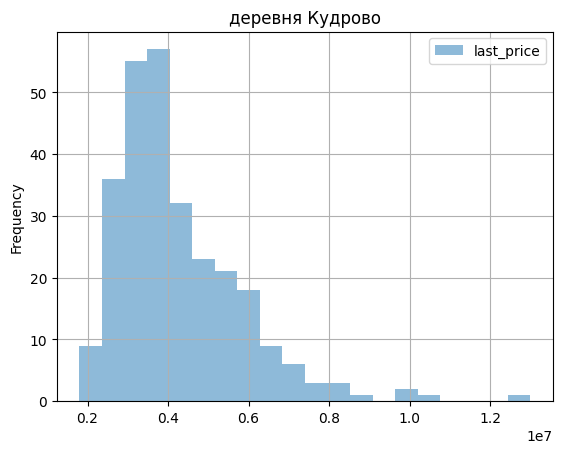

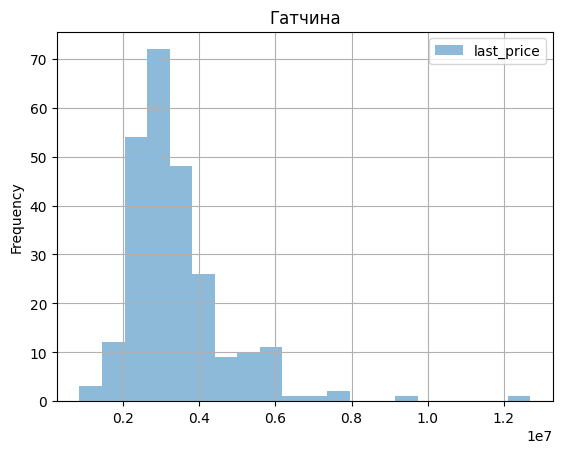

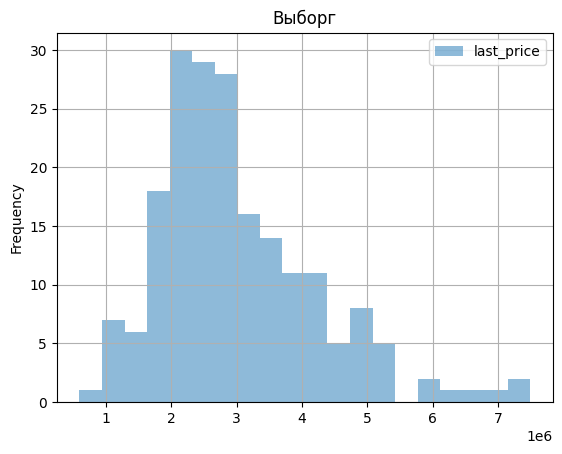

In [158]:
#построение столбчатых диаграмм (гисторамм) для топ 10 городов
#locality_top10.index

for j in locality_top10.index:
    df_fltred.query('locality_name == @j').plot(y='last_price', kind='hist', bins=20, grid=True, alpha=0.5, title=j)

<div class="alert alert-block alert-warning">
Очевидно, что самое дорогое жильё в Санкт-Петербурге, а самое дешёвое в Выборге.

<div class="alert alert-block alert-info">
<b>    
Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. 
    
Выделите квартиры в Санкт-Петербурге (locality_name). 
    
Ваша задача — выяснить, какая область входит в центр. 
    
Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. 
    
После этого посчитайте среднюю цену для каждого километра. 
    
Постройте график: он должен показывать, как цена зависит от удалённости от центра. 
    
Определите границу, где график сильно меняется, — это и будет центральная зона.
<b>
</div>

In [159]:
df_spb = df_fltred.query('locality_name == "Санкт-Петербург"')

In [160]:
df_spb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12643 entries, 1 to 19134
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          12643 non-null  Int8   
 1   last_price            12643 non-null  Int32  
 2   total_area            12643 non-null  float64
 3   first_day_exposition  12643 non-null  object 
 4   rooms                 12643 non-null  Int8   
 5   ceiling_height        12643 non-null  float64
 6   floors_total          12643 non-null  int8   
 7   living_area           12643 non-null  float64
 8   floor                 12643 non-null  Int8   
 9   is_apartment          12643 non-null  bool   
 10  studio                12643 non-null  bool   
 11  open_plan             12643 non-null  bool   
 12  kitchen_area          12643 non-null  float64
 13  balcony               12643 non-null  Int8   
 14  locality_name         12643 non-null  object 
 15  airports_nearest   

In [161]:
df_spb['cityCenters_nearest_1km'] = (df_spb['cityCenters_nearest'] / 1000).astype('Int16')

/tmp/ipykernel_7689/373996637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spb['cityCenters_nearest_1km'] = (df_spb['cityCenters_nearest'] / 1000).astype('Int16')


In [162]:
# Код ревьюера

# Вот пример на массивах, но с df похожая ситуация может произойти
list_1 = [1, 2, 3]
list_2 = list_1
list_2[0] = 4

print('По идее list_1 не должен меняться, но list_1 =', list_1)

list_1 = [1, 2, 3]
list_2 = list_1.copy()
list_2[0] = 4

print('list_1 не изменился, list_1 =', list_1)

По идее list_1 не должен меняться, но list_1 = [4, 2, 3]
list_1 не изменился, list_1 = [1, 2, 3]


In [163]:
#проверка
df_spb['cityCenters_nearest_1km'].max()

29

In [164]:
#расчет средней цены для каждого километра
df_spb_groupby_1km = df_spb.groupby('cityCenters_nearest_1km', as_index=False).last_price.mean()
df_spb_groupby_1km

,cityCenters_nearest_1km,last_price
0,0,10933714.285714
1,1,11295793.326667
2,2,9856449.763033
3,3,9243801.129477
4,4,10402088.874608
5,5,9769613.609434
6,6,8569542.190769
7,7,8545099.673077
8,8,7655431.927619
9,9,6072315.369603


<Axes: xlabel='cityCenters_nearest_1km'>

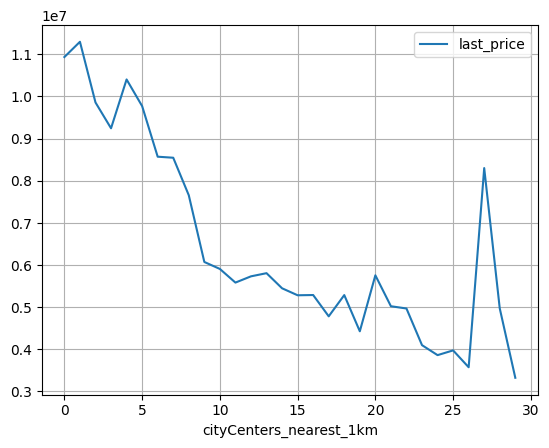

In [165]:
df_spb_groupby_1km.plot(x='cityCenters_nearest_1km', y='last_price', grid=True, alpha=1)#, kind='scatter')
#plt.ylim(0, 150)

<div class="alert alert-block alert-warning">

По этому графику сложно сказать где "сильно" меняется цена. 
Резкий перепад цены виден в районе 7 км от центра.  
    
Тогда по этим рассуждениям приму что центральная зона расположена от 0 до 7 км.

<div class="alert alert-block alert-info">
<b>    
Выделите сегмент квартир в центре. 
    
Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. 
    
Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 
    
    
Сделайте выводы. 
    
Отличаются ли они от общих выводов по всей базе?
<b>    
</div>

In [166]:
df_spb_center = df_spb.query('cityCenters_nearest_1km <= 7')
df_spb_center.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2585 entries, 21 to 19130
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   total_images             2585 non-null   Int8   
 1   last_price               2585 non-null   Int32  
 2   total_area               2585 non-null   float64
 3   first_day_exposition     2585 non-null   object 
 4   rooms                    2585 non-null   Int8   
 5   ceiling_height           2585 non-null   float64
 6   floors_total             2585 non-null   int8   
 7   living_area              2585 non-null   float64
 8   floor                    2585 non-null   Int8   
 9   is_apartment             2585 non-null   bool   
 10  studio                   2585 non-null   bool   
 11  open_plan                2585 non-null   bool   
 12  kitchen_area             2585 non-null   float64
 13  balcony                  2585 non-null   Int8   
 14  locality_name         

<Axes: >

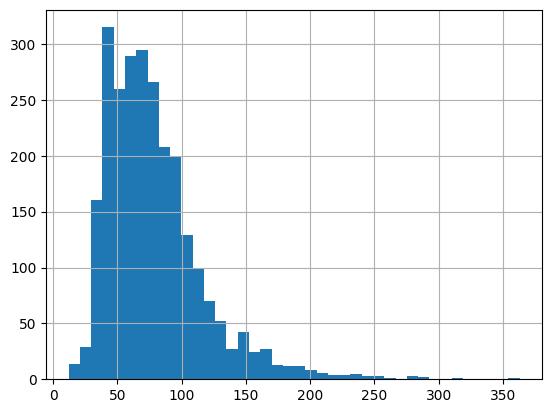

In [167]:
#площадь
df_spb_center['total_area'].hist(bins=40)

In [168]:
df_spb_center['total_area'].describe()

count    2585.000000
mean       78.778901
std        38.540318
min        12.000000
25%        51.000000
50%        71.500000
75%        95.800000
max       363.000000
Name: total_area, dtype: float64

<div class="alert alert-block alert-warning">
Наиболее распространены квартиры с площадью около 71 м2

<Axes: >

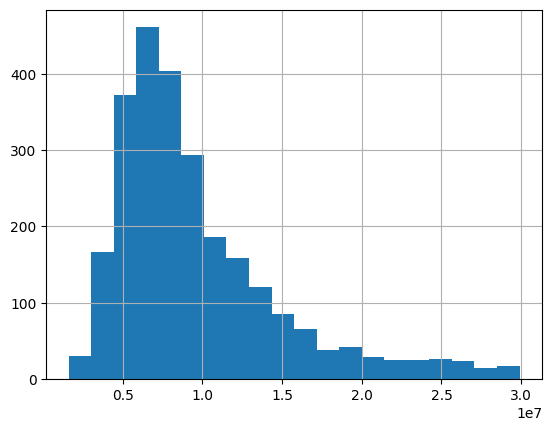

In [169]:
#цена
df_spb_center['last_price'].hist(bins=20)

In [170]:
df_spb_center['last_price'].describe()

count            2585.0
mean     9674068.833269
std      5282886.506859
min           1600000.0
25%           6050000.0
50%           8150000.0
75%          11879250.0
max          29900000.0
Name: last_price, dtype: Float64

<Axes: >

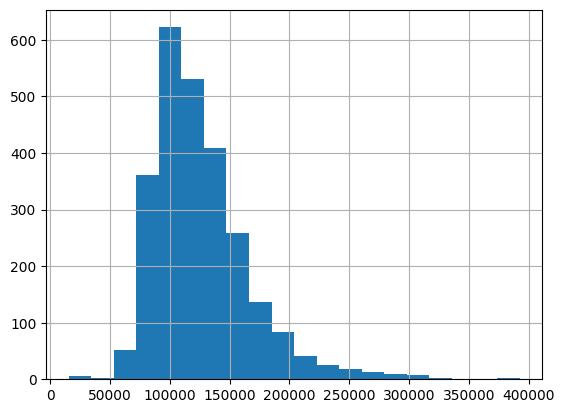

In [171]:
df_spb_center['price_square_meter'].hist(bins=20)

In [172]:
df_spb_center['price_square_meter'].describe()

count           2585.0
mean     125936.200758
std       41206.543932
min       15345.268542
25%       97736.625514
50%      117647.058824
75%      144888.888889
max      392354.124748
Name: price_square_meter, dtype: Float64

<div class="alert alert-block alert-warning">
Чаще всего цена в центре СПб на квартиры составляет от 5ти до 8ми млн.руб.

<Axes: >

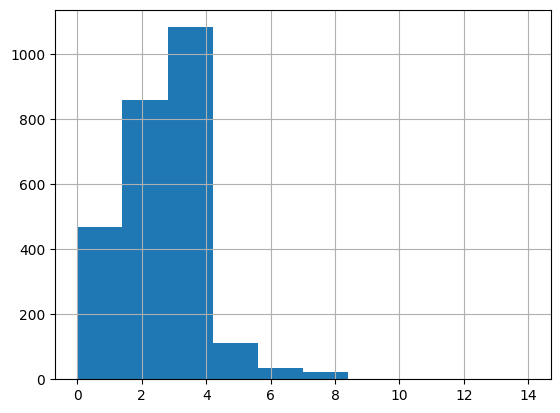

In [173]:
#число комнат
df_spb_center['rooms'].hist(bins=10)

In [174]:
#число комнат
df_spb_center['rooms'].value_counts()

2     859
3     778
1     454
4     305
5     111
6      35
7      19
0      16
8       4
14      2
9       1
10      1
Name: rooms, dtype: Int64

<div class="alert alert-block alert-warning">
Самые распространенные квартиры 2-х комнатные, следующие за ними 3х-комнатные, после них 1 комнатные

<Axes: >

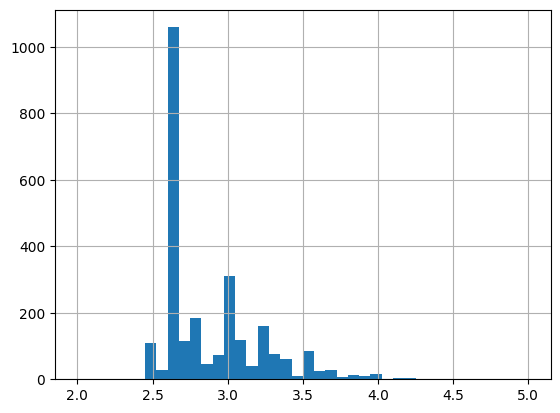

In [175]:
#высота потолков
df_spb_center['ceiling_height'].hist(bins=40, range=(2, 5))

<div class="alert alert-block alert-warning">
По высоте полотков имеется три пика.
    
    1-й высота потолка 2,7 м. Это самая распространённая группа
    2-й пик высота потолка 3,0 м, похоже что это квартиры которые строились до революции.
    3-й высота потолка 2,5 м. Наверное это так называемые "хрущёвки"
    

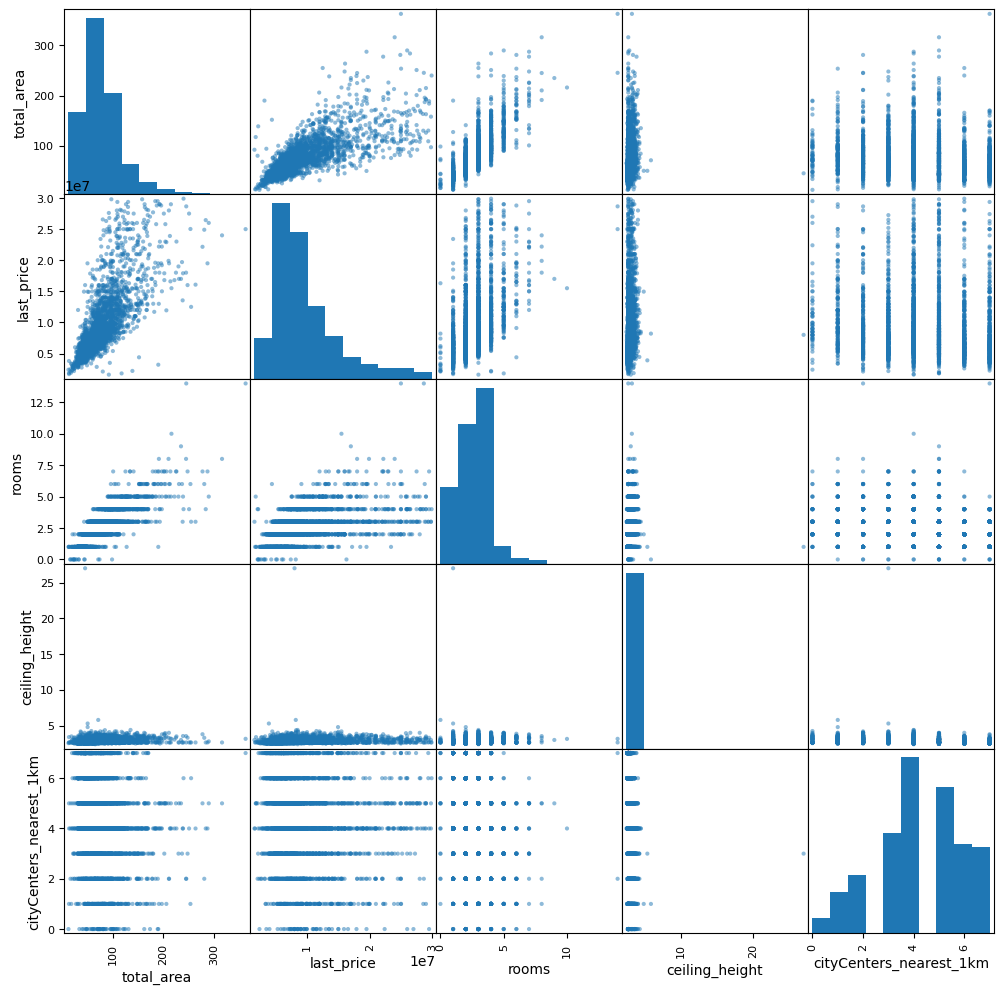

In [176]:
#построение матрицы диаграмм рассеяния для некоторых величин

pd.plotting.scatter_matrix(df_spb_center[
    [
        'total_area',
        'last_price',
        'rooms',
        'ceiling_height',
        'cityCenters_nearest_1km',
        #''
    ]], figsize=(12, 12));

<div class="alert alert-block alert-warning">

Матрица диаграмм рассеяния подтверждает предыдущие выводы. Так же видня зависимость цены от площади, от количества комнат. И так же не прослеживается связи между ценой и высотой потолков или другими величинами.
    
    

    

<div class="alert alert-block alert-info">
<b>
Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

<Axes: xlabel='rooms', ylabel='last_price'>

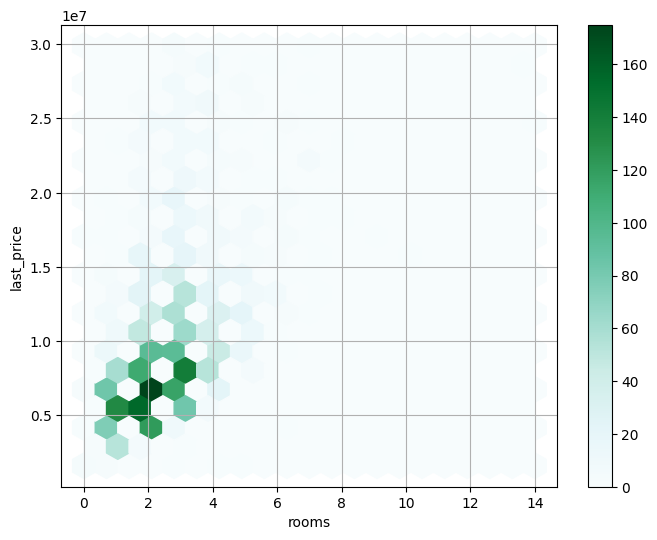

In [177]:
#"сотовый" график зависимости цены от количества комнат
df_spb_center.plot(x='rooms', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

<div class="alert alert-block alert-warning">
    Больше комнат - больше цена
    

<Axes: xlabel='floor_type', ylabel='price_square_meter'>

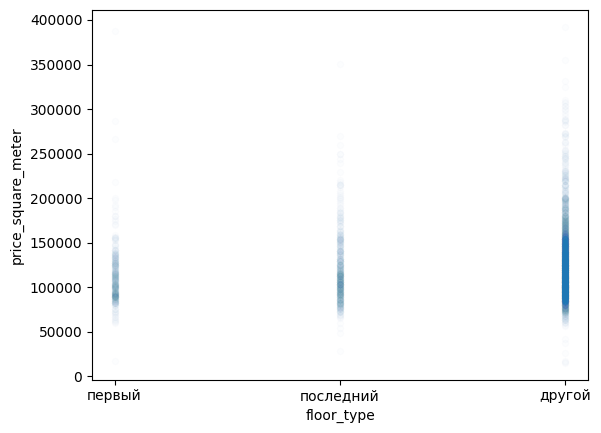

In [178]:
df_spb_center.plot(x='floor_type', y='price_square_meter', kind='scatter', alpha=0.01)

In [179]:
#группировка по типу этажа и подсчёт средней цены квадратного метра квартиры
df_spb_center.groupby('floor_type')['price_square_meter'].mean().sort_values()

floor_type
первый       112012.867243
последний    120103.722083
другой       129629.293645
Name: price_square_meter, dtype: Float64

<div class="alert alert-block alert-warning">
Практически нет разницы первый этаж, последний или посередине. Но тем не менее, первый и последний этажи дешевле чем этажи "посередине"

<Axes: xlabel='cityCenters_nearest_1km', ylabel='last_price'>

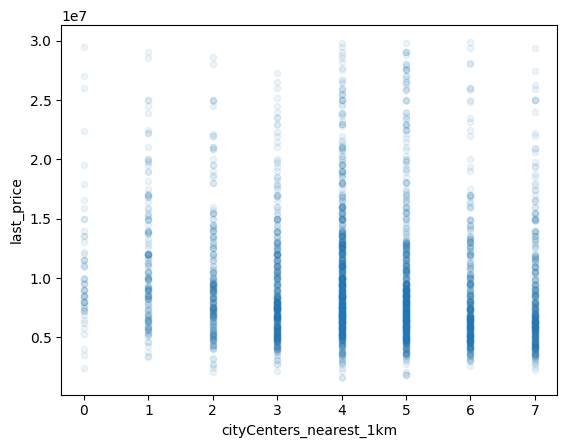

In [180]:
#график зависимости цены от расстояния от центра
df_spb_center.plot(x='cityCenters_nearest_1km', y='last_price', kind='scatter', alpha=0.08)
#df_spb_center.plot(x='cityCenters_nearest_1km', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

In [181]:
#группировка по расстоянию от центра и подсчёт средней цены квартиры
df_spb_center.groupby('cityCenters_nearest_1km')['last_price'].mean().sort_values(ascending=False)

cityCenters_nearest_1km
1    11295793.326667
0    10933714.285714
4    10402088.874608
2     9856449.763033
5     9769613.609434
3     9243801.129477
6     8569542.190769
7     8545099.673077
Name: last_price, dtype: Float64

<div class="alert alert-block alert-warning">
Есть небольшая зависимость, чем ближе к центру тем дороже. Но эта зависимость не очень явная.

<Axes: xlabel='year', ylabel='last_price'>

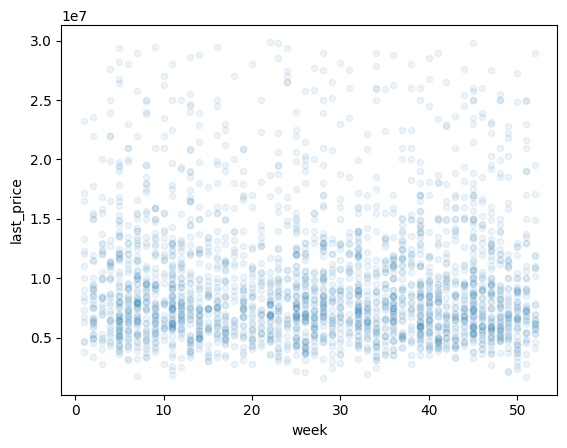

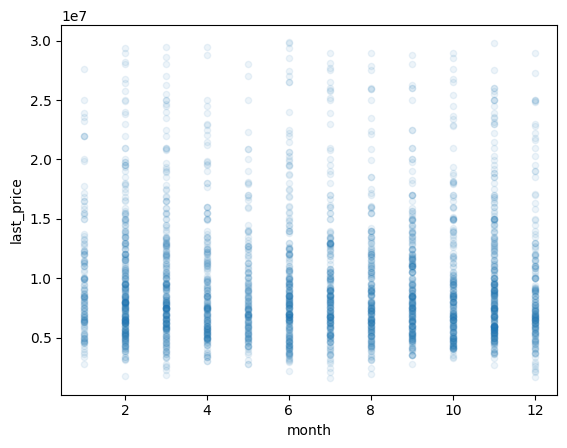

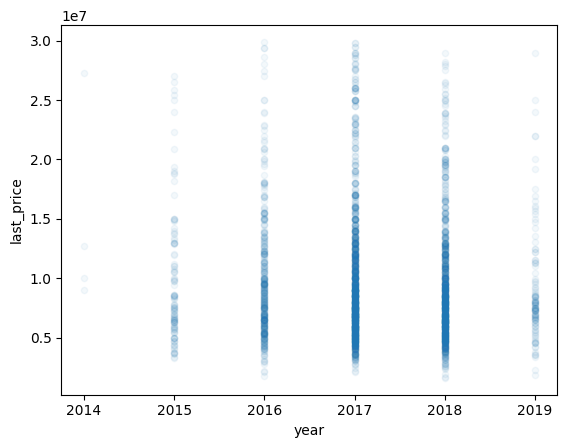

In [182]:
#зависимость цены от дня недели, года и месяца подачи обьявления
df_spb_center.plot(x='week', y='last_price', kind='scatter', alpha=0.08)
df_spb_center.plot(x='month', y='last_price', kind='scatter', alpha=0.08)
df_spb_center.plot(x='year', y='last_price', kind='scatter', alpha=0.05)

<div class="alert alert-block alert-warning">
Не видно какой-то зависимости.

Видно что больше обьявлений было в 2017м и 2018м годах

year
2014    115965
2015    118234
2016    122793
2017    125449
2018    127742
2019    134903
Name: price_square_meter, dtype: int64

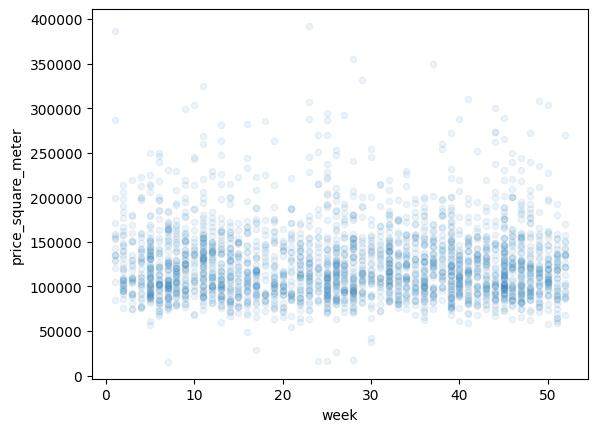

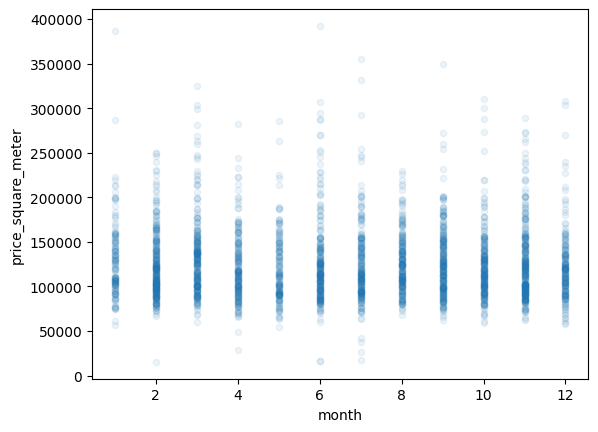

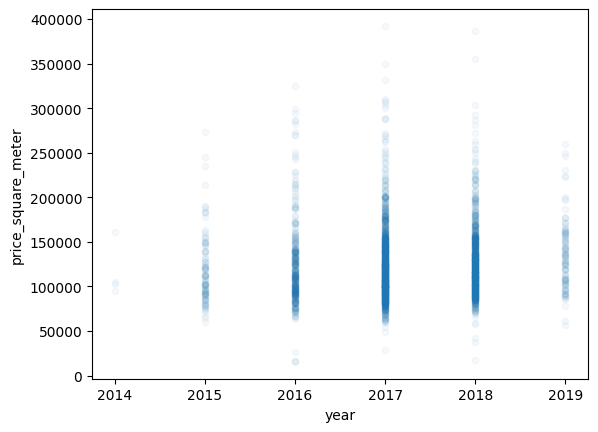

In [183]:
#зависимость цены квадратного метра от дня недели, года и месяца подачи обьявления
df_spb_center.plot(x='week', y='price_square_meter', kind='scatter', alpha=0.08)
df_spb_center.plot(x='month', y='price_square_meter', kind='scatter', alpha=0.08)
df_spb_center.plot(x='year', y='price_square_meter', kind='scatter', alpha=0.04)

#группировка по году и подсчёт средней цены квадратного метра квартиры
df_spb_center.groupby('year')['price_square_meter'].mean().astype(int).sort_values()

<div class="alert alert-block alert-warning">
Есть единственная зависимость цены квадратного метра квартиры от года. 
Чем больше год тем дороже квадратный метр.
    
    Для 2015го года цена кв.м около 114тыс.руб, а для 2019го уже 135тыс.руб.

<Axes: ylabel='Frequency'>

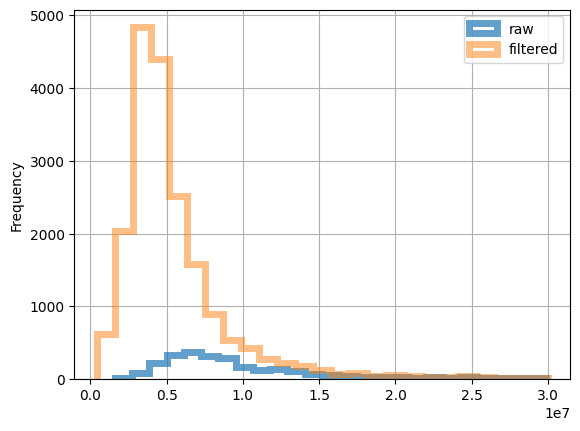

In [184]:
spb_hist_last_price = df_spb_center.plot(
    kind='hist',
    y='last_price',
    histtype='step',
#    range=(0, 500),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='raw',
)

df_fltred.plot(
    kind='hist',
    y='last_price',
    histtype='step',
#    range=(0, 500),
    bins=25,
    linewidth=5,
    alpha=0.5,
    label='filtered',
    ax=spb_hist_last_price,
    grid=True,
    legend=True,
) 

<div class="alert alert-block alert-warning">
Пик гистограммы цены, для СПб, смещён вправо относительно пика для всей области. 
    
То есть медианные цены на квартиры в СПб действительно выше чем по области.

## Общий вывод

<div class="alert alert-block alert-warning">
    
    
Проведено исследование обьявлений о продаже квартир для Ленинграда и области.
    
Проверены различные зависимости цены квартир от других параметров.

Исследованию подверглись площадь, цена, число комнат, высота потолков, время продажи квартир и другие характеристики.
Отдельно проведен анализ для квартир Санкт-Петербурга и его центра.

Проведена предобработка входных данных. Пропущенные значения заменены медианой, там где это имеет смысл.

Изменены типы данных, для уменьшения занимаемой памяти и ускорения вычислений.  
      
** **    
**Основные характеристики квартир по всей области:**
- Мединная площадь квартир - 52м2
- Медианная цена - 4,65млн.руб
- Наиболее распространённое число комнат - 2,3
- Медианная высота потолков - 2,65м
- Время продажи квартиры - 95 дней
    
** **
**Цена на квартиры зависит от площади, числа комнат, удалённости от центра.**
    
- Площадь больше - цена больше
- Комнат больше - цена больше
- Удалённость от центра больше - цена меньше
- Самые дешёвые квартиры на первом и последнем этаже
- От даты размещения объявления (день, месяц, года) зависимости нет
** **
**10 Населенных пунктов с наибольшим числом обьявлений:**

Название         |кол-во обьявлений|ср.цена, млн.р
---------------- | --------------- | --------------
Санкт-Петербург  | 12643           |6.5
посёлок Мурино   | 498             |3.6
посёлок Шушары   | 394             |4.1
Всеволожск       | 323             |3.7
Колпино          | 299             |3.8
посёлок Парголово| 293             |4.4
Пушкин           | 287             |5.9
деревня Кудрово  | 277             |4.3
Гатчина          | 251             |3.4
Выборг           | 196             |3



Из этих 10ти нас.пунктов самое дорогое жильё в Санкт-Петербурге, а самое дешёвое в Выборге.

** **
**В центр города СПб входит область радиусом 7 км.**
    
Квартиры, дальше этого расстояния, резко падают в цене.
    
** **
**Квартиры в центре СПб (радиус 7 км) имеют следующие характеристики (значения медианные):**
- площадь - 96м2
- цена - 8,15млн.руб
- число комнат - 2,3,1 (по убыванию)
- высота потолков - 2,7м.
    
</div>